In [31]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

In [39]:
class Mean_Shift:
    
    # Constructor 
    def __init__(self, radius=3): # Default Radius is 3 (You can tune it accordingly)
        self.radius = radius
        self.centroids = {}
        
    # Create Clusters   
    def fit(self, data):
        centroids = {}
        
        for i in range(0,len(data)):
            centroids[i]=data[i]
            
        optimised=False
        while(not optimised):
            updatedCentroids = []
            #checking each centroid
            for i in centroids:
                insideRadius=[]
                centroid = centroids[i]
                for j in data:
                    ##normalise data and compare with radius
                     if np.linalg.norm(j-centroid) < self.radius:
                        insideRadius.append(j)
                updatedCentroid = np.average(insideRadius,axis=0)
                updatedCentroids.append(tuple(updatedCentroid))

            #find unique elements
            setCentroids=set(updatedCentroids)
            uniqueCentroids=sorted(list(setCentroids))
            
            #copy centroids
            previousCentroids=dict(centroids)
            
            #update Centroid Array
            centroids = {}
            for i in range(0,len(uniqueCentroids)):
                centroids[i] = np.array(uniqueCentroids[i])
            optimised=True
            
            #check convergence
            for i in centroids:
                if(not np.array_equal(centroids[i], previousCentroids[i])):
                    optimised=False
                    break
        self.centroids = centroids

        # Your Code Here

     

In [40]:
# Creating Data Set of clusters
X, _ = make_blobs(n_samples = 200, cluster_std =1.5)

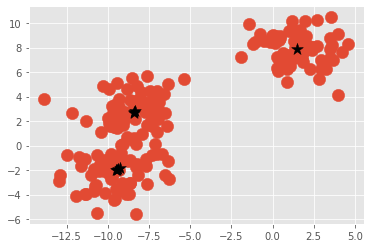

In [41]:
# Creating Object of Class
clf = Mean_Shift()
clf.fit(X)

# Getting Optimized Centroids

centroids = clf.centroids

# Simple Scatter plot of 2D Data X
plt.scatter(X[:,0], X[:,1],s=150)

# Plot Cluster centroids as '*'
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()